In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
X_train = np.loadtxt('datasets/input.csv', delimiter=',')   # Pandas dan aktarıp array'a dönüştürmeye gerek
y_train = np.loadtxt('datasets/labels.csv', delimiter=',')  # kalmadan yüklemek.

X_test = np.loadtxt('datasets/input_test.csv', delimiter=',')
y_test = np.loadtxt('datasets/labels_test.csv', delimiter=',')

In [4]:
X_train = X_train.reshape(len(X_train),100,100,3)
y_train = y_train.reshape(len(y_train),1)

X_test = X_test.reshape(len(X_test),100,100,3)
y_test = y_test.reshape(len(y_test),1)

In [5]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


In [6]:
X_train /= 255.0  # 0-255 arasındaki tüm rgb değerlerini 0-1 arasına sıkıştırır
X_test /= 255.0

In [7]:
X_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

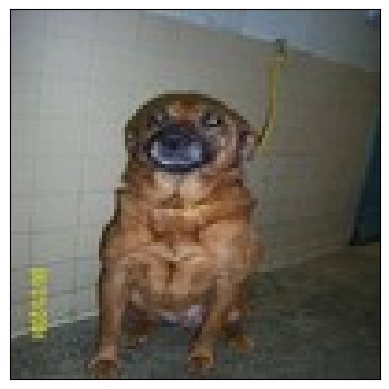

In [8]:
idx = random.randint(0, len(X_train))
class_names = []  #labelleri/etiketleri


plt.imshow(X_train[idx])
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

In [9]:
from tensorflow.keras.models import Sequential  #katmanları(conv,pooling,flatten,fullconnected) sırayla istifler.
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dense, Flatten

In [10]:
# MODEL OLUŞTURMA -1
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)), # 32 tane 3,3 lük filtereler giriş veriler (100,100,3) olan resimlere uygulanacak.
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    #Full-Connected layer
    Dense(64, activation = 'relu'),  #input layer
    Dense(1, activation = 'sigmoid') #output layer
])

In [11]:
# MODEL OLUŞTURMA -2
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [12]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [13]:
model.fit(X_train, y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 3s 77ms/step - loss: 0.7589 - accuracy: 0.5190
Epoch 2/5
32/32 [==============================] - 3s 97ms/step - loss: 0.6809 - accuracy: 0.5960
Epoch 3/5
32/32 [==============================] - 2s 75ms/step - loss: 0.6318 - accuracy: 0.6385
Epoch 4/5
32/32 [==============================] - 3s 90ms/step - loss: 0.6081 - accuracy: 0.6525
Epoch 5/5
32/32 [==============================] - 3s 91ms/step - loss: 0.5354 - accuracy: 0.7335


In [14]:
model.evaluate(X_test, y_test)

13/13 [==============================] - 0s 14ms/step - loss: 0.6210 - accuracy: 0.6650


[0.621044397354126, 0.6650000214576721]

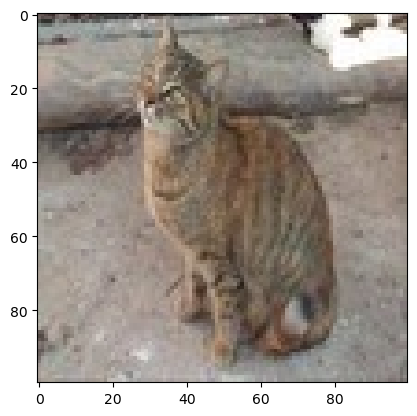

1/1 [==============================] - 0s 86ms/step
[[0.3600269]]
Our model says it is a : dog


In [15]:
idx2 = random.randint(0, len(y_test)) #idx2 = random.randint(0, len(y_test)): This line generates a random index (idx2) within the range of valid indices for your test dataset. len(y_test) gives the number of samples in your test set.
plt.imshow(X_test[idx2, :]) # plt.imshow(X_test[idx2, :]): This line uses imshow from the Matplotlib library to display the image corresponding to the randomly selected index idx2 from the X_test array. X_test is typically a collection of input images used for testing the neural network.
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
print(y_pred)
y_pred = y_pred > 0.5  # eğer 0.5 den küçükse 0(dog) alır büyükse 1(cat).


if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says it is a :", pred)